In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy.stats import poisson
import numpy as np

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
file_dir = "/net/home/dlee/brca1/data/"

In [4]:
filename_pergene = "lof/LOEUF/Roulette_obs_exp_pergene.tsv.gz"
df_pergene = pd.read_csv(file_dir + filename_pergene, sep = "\t")

In [5]:
df_pergene["upper_oe_lof"] = df_pergene["upper_oe_lof"].astype(float)

## plot observed over expected

<AxesSubplot:xlabel='p_poly_scaled', ylabel='polymorphic'>

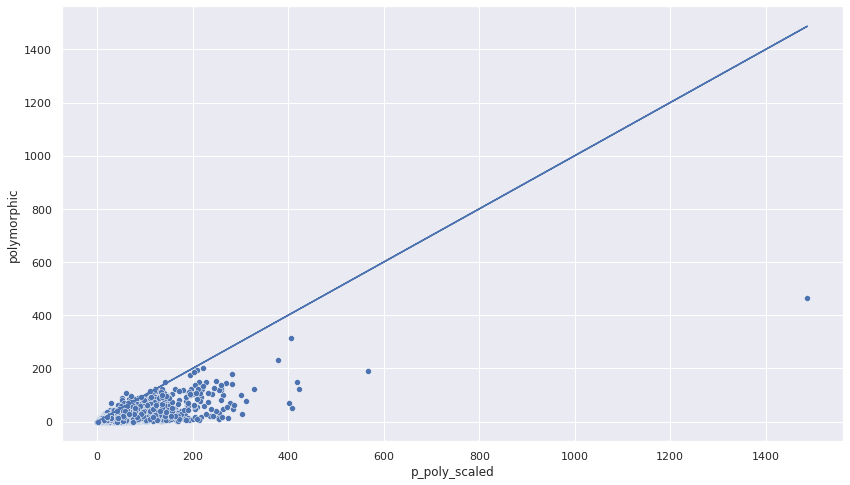

In [6]:
plt.subplots(figsize=(14, 8))

x = df_pergene["p_poly_scaled"]
plt.plot(x, x)

sns.scatterplot(data=df_pergene, x="p_poly_scaled", y="polymorphic")

## Analyze result of LOEUF

In [7]:
## load LOEUF scores

data_dir = "/net/home/dlee/brca1/data/"

loeuf = pd.read_csv(data_dir + "lof/supplementary_dataset_11_full_constraint_metrics.tsv", sep = "\t")

loeuf = loeuf[loeuf["canonical"] == True]

loeuf.rename({"gene_id": "Gene"}, axis = 1, inplace = True)

In [34]:
## load AD AR genes

adar_dir = "/net/home/dlee/brca1/data/clinical/AD_AR_fromDan_revised/"

ad_hq = pd.read_csv(adar_dir +"AD/CGD_AD_HQ_ENSG.tsv", sep = "\t")
ad = pd.read_csv(adar_dir +"AD/CGD_AD_2020_ENSG.tsv", sep = "\t")

ad["type"] = "AD"
ad_hq["type"] = "AD_HQ"

In [38]:
df_pergene_merged = df_pergene.merge(loeuf[["Gene", "oe_lof_upper", "obs_lof", "exp_lof"]], how = "inner", on = "Gene", suffixes=('_Roulette', '_gnomAD'))

df_pergene_merged["oe_lof_upper_supplementary"] = df_pergene_merged["oe_lof_upper"]
df_pergene_merged["oe_lof_upper_new_Roulette"] = df_pergene_merged["upper_oe_lof"]

In [39]:
#make decile
df_pergene_merged["oe_lof_upper_supplementary_decile"] = pd.qcut(df_pergene_merged["oe_lof_upper_supplementary"], 10, labels = False)
df_pergene_merged["oe_lof_upper_new_Roulette_decile"] = pd.qcut(df_pergene_merged["oe_lof_upper_new_Roulette"], 10, labels = False)

In [41]:
df_pergene_merged_output = df_pergene_merged.merge(ad_hq[["Gene", "type"]], how = "left", on = "Gene")

ad_len = len(df_pergene_merged_output[df_pergene_merged_output["type"] =="AD_HQ"])
print(ad_len)

for decile in range(10):
    print(decile)
    
    shet_dec = df_pergene_merged_output[df_pergene_merged_output["oe_lof_upper_supplementary_decile"] == decile]
    print(len(shet_dec[shet_dec["type"] == "AD_HQ"])/ad_len)
    
    shet_dec = df_pergene_merged_output[df_pergene_merged_output["oe_lof_upper_new_Roulette_decile"] == decile]
    print(len(shet_dec[shet_dec["type"] == "AD_HQ"])/ad_len)

233
0
0.4892703862660944
0.5064377682403434
1
0.18454935622317598
0.19313304721030042
2
0.10300429184549356
0.11587982832618025
3
0.06866952789699571
0.05150214592274678
4
0.060085836909871244
0.06437768240343347
5
0.030042918454935622
0.02145922746781116
6
0.02145922746781116
0.017167381974248927
7
0.017167381974248927
0.012875536480686695
8
0.017167381974248927
0.012875536480686695
9
0.008583690987124463
0.004291845493562232


In [40]:
df_pergene_merged_output = df_pergene_merged.merge(ad[["Gene", "type"]], how = "left", on = "Gene")

ad_len = len(df_pergene_merged_output[df_pergene_merged_output["type"] =="AD"])
print(ad_len)

for decile in range(10):
    print(decile)
    
    shet_dec = df_pergene_merged_output[df_pergene_merged_output["oe_lof_upper_supplementary_decile"] == decile]
    print(len(shet_dec[shet_dec["type"] == "AD"])/ad_len)
    
    shet_dec = df_pergene_merged_output[df_pergene_merged_output["oe_lof_upper_new_Roulette_decile"] == decile]
    print(len(shet_dec[shet_dec["type"] == "AD"])/ad_len)

1169
0
0.29426860564585117
0.32506415739948674
1
0.19674935842600513
0.17964071856287425
2
0.11719418306244654
0.11890504704875962
3
0.08041060735671514
0.0872540633019675
4
0.0718562874251497
0.06928999144568007
5
0.05645851154833191
0.05645851154833191
6
0.05303678357570573
0.0504704875962361
7
0.055603079555175364
0.041060735671514116
8
0.02737382378100941
0.037639007698887936
9
0.046193327630453376
0.03421727972626176
